<a href="https://colab.research.google.com/github/shellycute2529/CODSOFT/blob/main/Task_2_Sales_Prediction_Using_Python_(CodeAlpha)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [5]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [10]:
df.isna()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [11]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


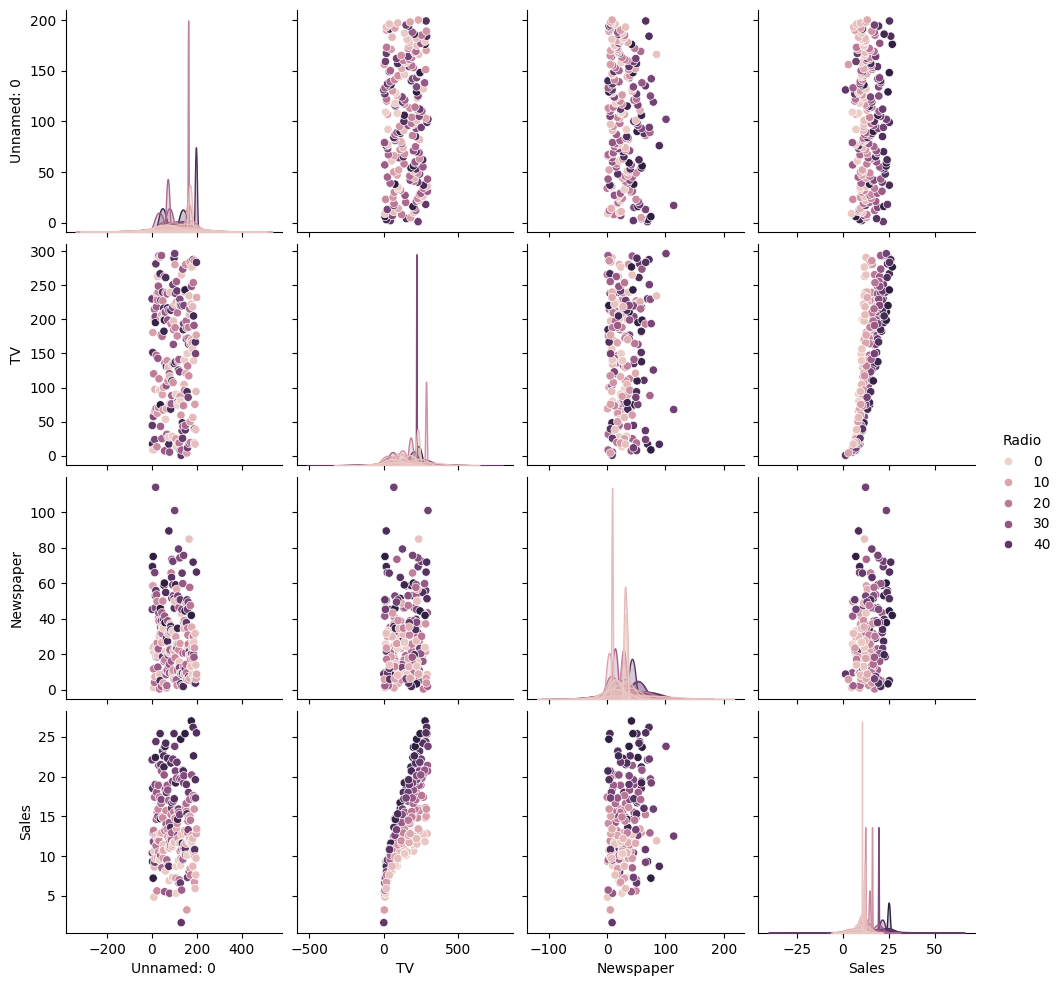

In [12]:
# visualize
# Pair Plot
sns .pairplot(df,hue="Radio")
plt.show()

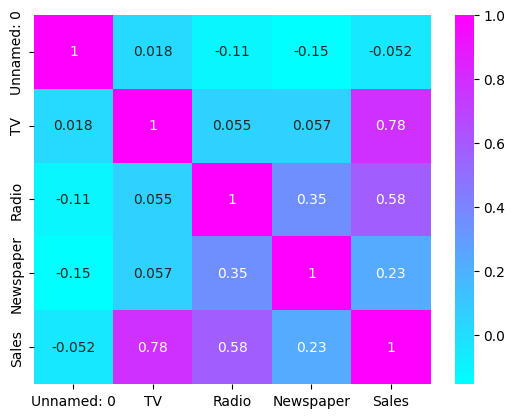

In [14]:
# heatmap
sns .heatmap(df.corr(), annot=True, cmap="cool")
plt.show()

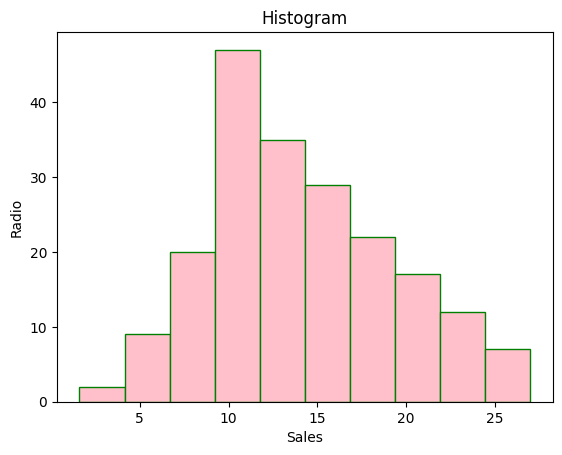

In [15]:
# histogram
plt.hist(df['Sales'], bins=10, color='pink', edgecolor='green')
plt.title("Histogram")
plt.xlabel("Sales")
plt.ylabel("Radio")
plt.show()

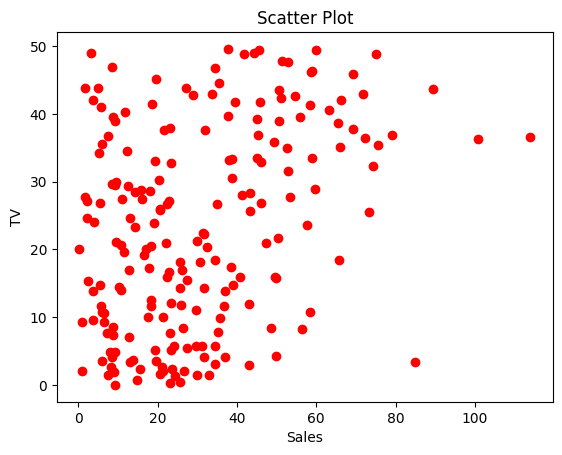

In [16]:
plt.scatter(df['Newspaper'], df['Radio'], color='red')
plt.title('Scatter Plot')
plt.xlabel('Sales')
plt.ylabel('TV')
plt.show()

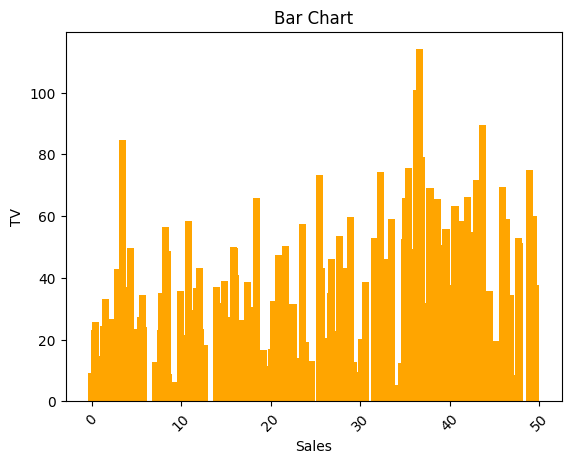

In [18]:
# bar chart
plt.bar(df['Radio'], df['Newspaper'], color= 'orange')
plt.xlabel('Sales')
plt.ylabel('TV')
plt.title('Bar Chart')
plt.xticks(rotation=45)
plt.show()

In [19]:
#preparing the data
x= df[['TV', 'Radio', 'Newspaper']]
y= df['Sales']

In [20]:
#Split the data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=42)

In [21]:
# training the regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

R Score: 0.899438024100912
Mean Squared Error: 3.1740973539761033


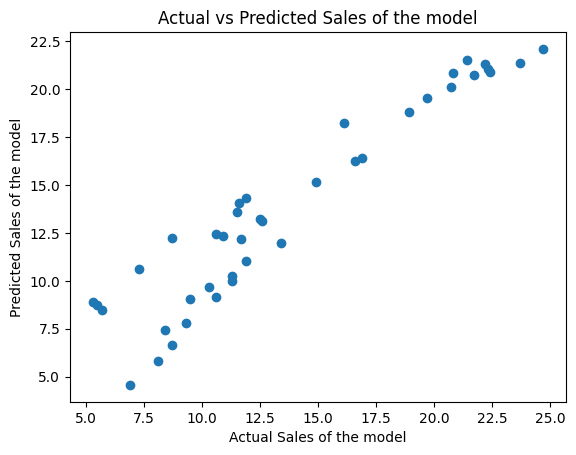

In [25]:
#making predictions
y_pred = model.predict(x_test)
print("R Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales of the model")
plt.ylabel("Predicted Sales of the model")
plt.title("Actual vs Predicted Sales of the model")
plt.show()

In [27]:
# interpreting the coefficients
coefficients = pd.DataFrame(model.coef_, x.columns, columns=["Coefficient"])
print(coefficients)

           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761
